# Simulation Project 1: Exploring Robustness of One Sample Estimation Procedures under varying Conditions

## Objective
The goal of this simulation study is to investigate how estimation and hypothesis testing is impacted by smaple size and the underlying population distribution. This study will comprise of two parts. 
- Normal Population with varying n
- Different Populations with varying n

## Import Required Packages and Setup Data


In [33]:
# Import the required packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting configuration and styles
sns.set_theme(
    style="darkgrid",          # Choose a clean background with gridlines
    palette="pastel",           # Use a pastel color palette
    context="talk",             # Suitable for presentations
    font_scale=1.2,             # Increase the font scale for better readability
    rc={
        "figure.figsize": (12, 8),          # Set default figure size
        "axes.labelsize": 14,               # Axis label font size
        "axes.titlesize": 16,               # Title font size
        "legend.fontsize": 12,              # Legend font size
        "xtick.labelsize": 12,              # X-axis tick label size
        "ytick.labelsize": 12,              # Y-axis tick label size
        "lines.linewidth": 2,                # Line width for plots
        "grid.linestyle": "--",              # Grid line style
        "grid.alpha": 0.7                    # Grid line transparency
    }
)

# Set up the random seed for reproducibility
np.random.seed(5571)

# Define the sample sizes for the experiment
sample_sizes_part1 = [5, 10, 30, 100, 500, 1000]
sample_sizes_part2 = [10, 30, 500]

# Simulate datasets from different populations with the same mwean and standard deviation
mu = 10
sigma = 10

# Functions to simulate the population data
def simulation_population_data(population_type, sample_size):
    population_data = np.array([])
    if population_type == 'normal':
        population_data = np.random.normal(mu, sigma, sample_size)
    elif population_type == 'gamma':
        population_data = np.random.gamma(mu**2/sigma**2, sigma**2/mu, sample_size)
    else:
        lam = 0.1 # for mu = 10 and sigma = 10, lambda = 1/10
        population_data = np.random.exponential(1/lam, sample_size)
    return population_data



## PART 1: Normal Population with Varying n



1. Obtain 1000 samples from the normal population (“Population 1”) and record the sample mean (mean()) and standard deviation (sd()) for each. Create a histogram (hist()) of the sample means and comment on what you observe (specifically, center, spread, and shape)– and comment on how things change as you increase the sample size 𝑛

2. Using the population standard deviation, 𝜎=10 compute 1000 𝑋¯−𝜇𝜎/𝑛√. Create a histogram of these values and comment on what you observe– and comment on how things change as you increase the sample size 𝑛.

3. Now using the sample standard deviations, compute 1000 𝑋¯−𝜇𝑠/𝑛√. Create a histogram of these values and comment on what you observe– and comment on how things change as you increase the sample size 𝑛

4. Create a histogram of the 1000 sample standard deviations and comment on what you observe– and comment on how things change as you increase the sample size 𝑛.

5. Using a significance level of 0.05, how many of the 1000 samples reject the null hypothesis 𝐻0:𝜇=10 (with a two-sided alternative) if you were to (1) use the population standard deviation 𝜎 and a critical value based on the normal distribution (i.e., use 1.96), (2) use the sample standard deviation 𝑠 and critical value based on the normal distribution (i.e., use 1.96), and (3) use the sample standard deviation 𝑠 and critical value based on the t-distribution (how many degrees of freedom would this be?). Create a table that shows the results across the different sample sizes.

In [34]:
simulations = 1000
results_normal_poulation = {
    'sample_size':[],
    'rejections_normal_sd_z':[],
    'rejections_sample_sd_z':[],
    'rejections_sample_sd_t':[],
}

for n in sample_sizes_part1:
    sample_means =[]
    sample_sds = []
    population_z =[]
    sample_z =[]

    rejections_population_z = 0
    rejections_sample_z = 0
    rejections_t = 0

    for _ in range(simulations):
        # Sample from the normal population
        sample_normal_population = simulation_population_data('normal', n)

        # Calculate the sample mean and standard deviation
        x_bar = np.mean(sample_normal_population)
        s = np.std(sample_normal_population, ddof=1)
        sample_means.append(x_bar)
        sample_sds.append(s)

        # Standardize using the population standard deviation by calculating the z-score
        z_population = (x_bar - mu)/(sigma/np.sqrt(n))
        population_z.append(z_population)

        # Standardize using the sample standard deviation by calculating the z-score
        z_sample = (x_bar - mu)/(s/np.sqrt(n))
        sample_z.append(z_sample)

        # Hypothesis testing
        # 1.Using Population standard deviation known
        if np.abs(z_population) > 1.96:
            rejections_population_z += 1

        # 2.Using Sample standard deviation
        if np.abs(z_sample) > 1.96:
            rejections_sample_z += 1

        # 3.Using t-test
        t_statistic = (x_bar - mu)/(s/np.sqrt(n))
        t_critical = stats.t.ppf(0.975, n-1)
        if np.abs(t_statistic) > t_critical:
            rejections_t += 1


    results_normal_poulation['sample_size'].append(n)
    results_normal_poulation['rejections_normal_sd_z'].append(rejections_population_z)
    results_normal_poulation['rejections_sample_sd_z'].append(rejections_sample_z)
    results_normal_poulation['rejections_sample_sd_t'].append(rejections_t)


1.  Histogram (hist()) of the sample means and comment on what you observe (specifically, center, spread, and shape)– and comment on how things change as you increase the sample size 𝑛

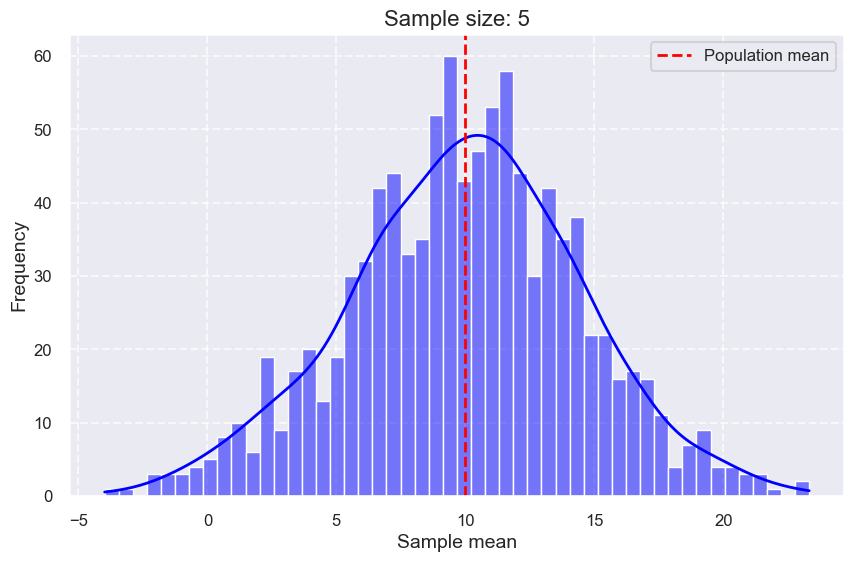

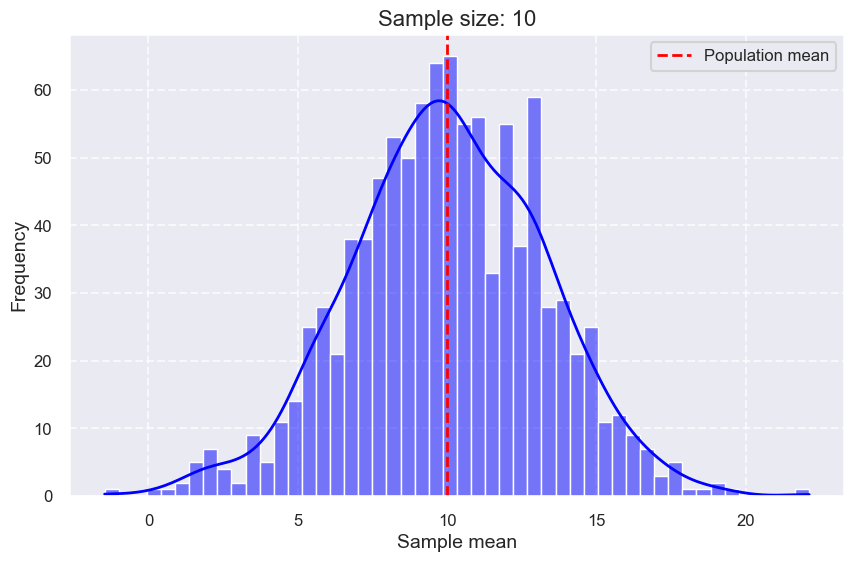

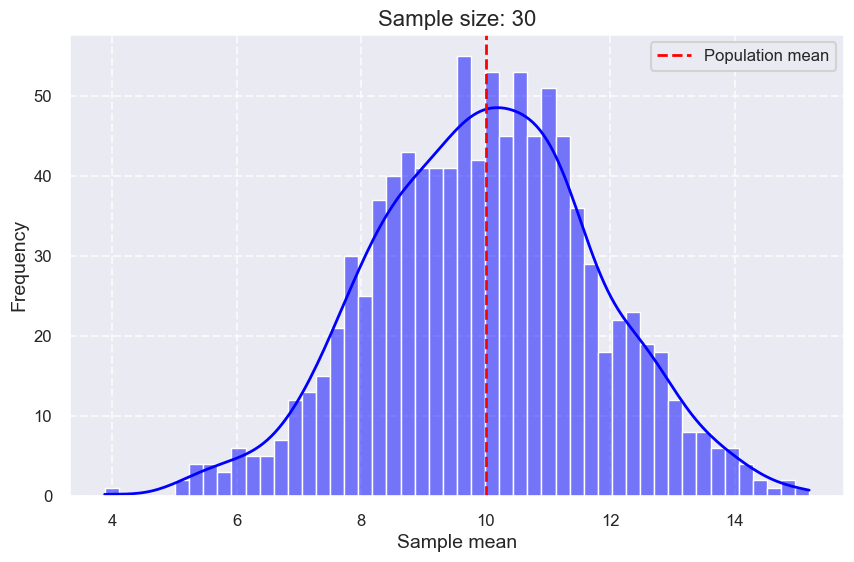

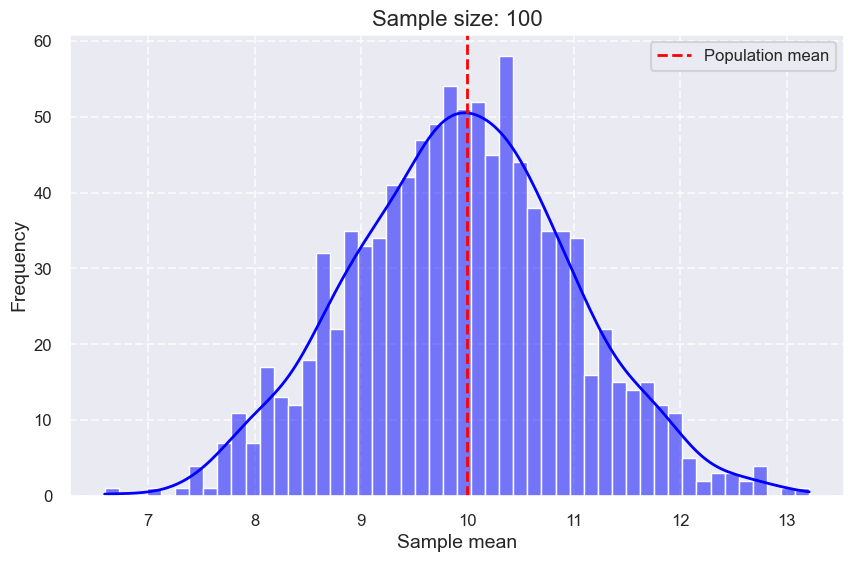

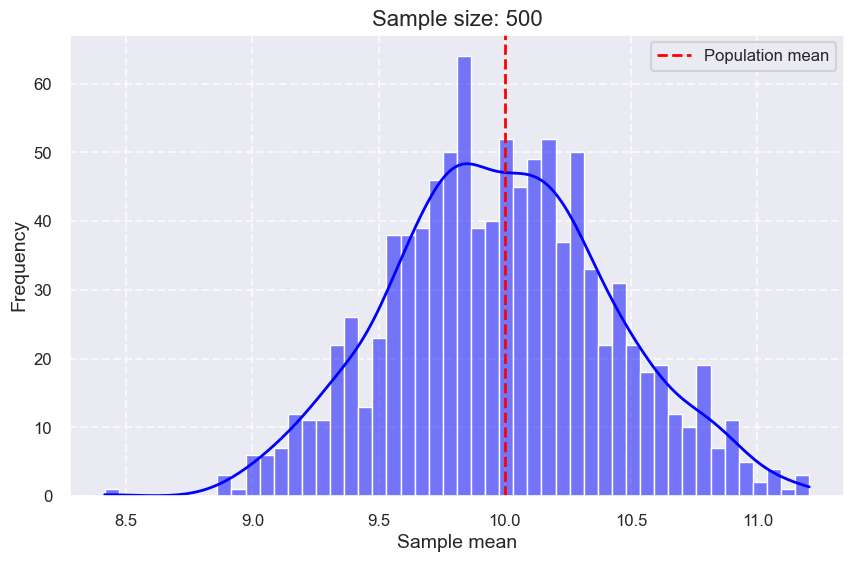

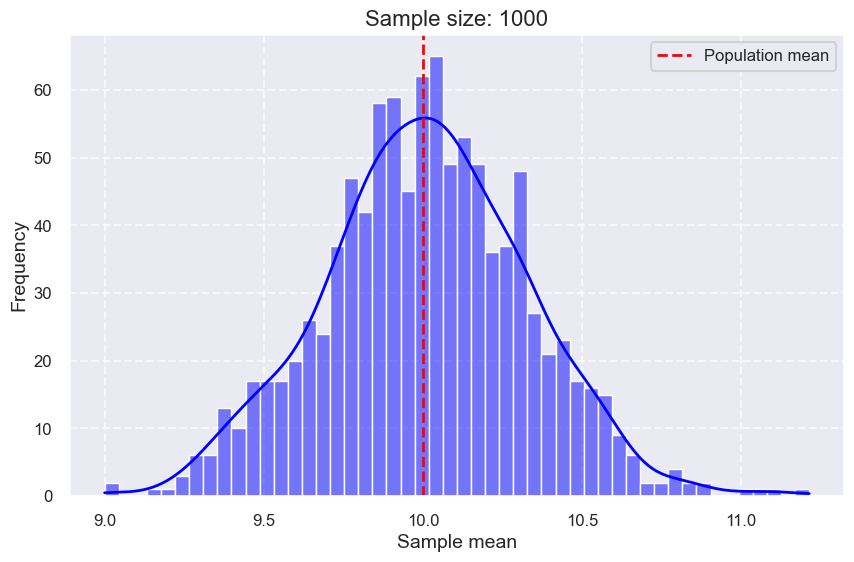

In [35]:
for n in sample_sizes_part1:
    sample_means =[]
    for _ in range(simulations):
        # Sample from the gamma population
        sample_normal_population = simulation_population_data('normal', n)

        # Calculate the sample mean and standard deviation
        x_bar = np.mean(sample_normal_population)
        sample_means.append(x_bar)
    # Plot the histogram of the sample means
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_means, kde=True, color='blue', bins=50)
    plt.title(f'Sample size: {n}')
    plt.xlabel('Sample mean')
    plt.ylabel('Frequency')
    plt.axvline(x=mu, color='red', linestyle='--', label='Population mean')
    plt.legend()
    plt.show()


Observations:
- **Center:** The distribution of the the sample means becomes more concentrated around the population mean, as we increase the sample size. 
- **Spread:** The spread or variance of the sample means decreases with the the increase in sample size. 
- **Shape:** The histograms show that the shape remains about normal regardless of the sample size.  

2. Using the population standard deviation, 𝜎=10 compute 1000 𝑋¯−𝜇𝜎/𝑛√. Create a histogram of these values and comment on what you observe– and comment on how things change as you increase the sample size 𝑛.

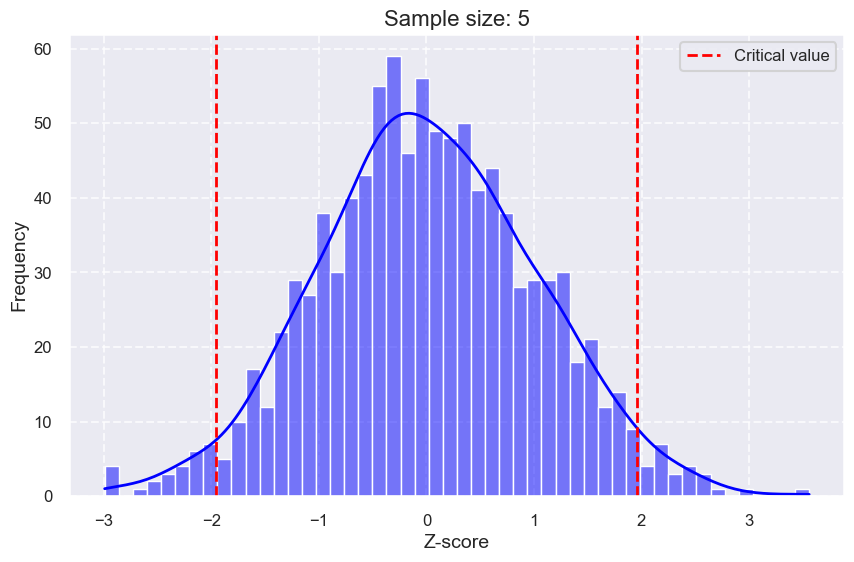

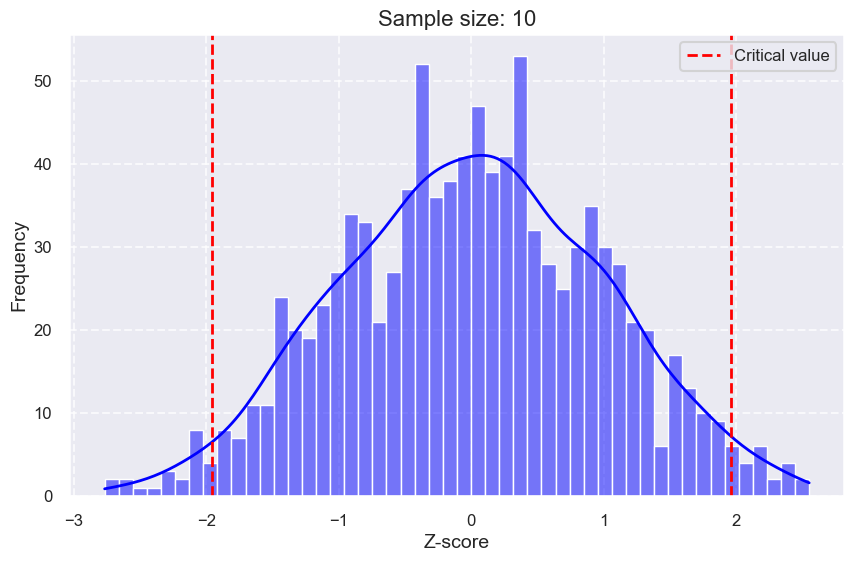

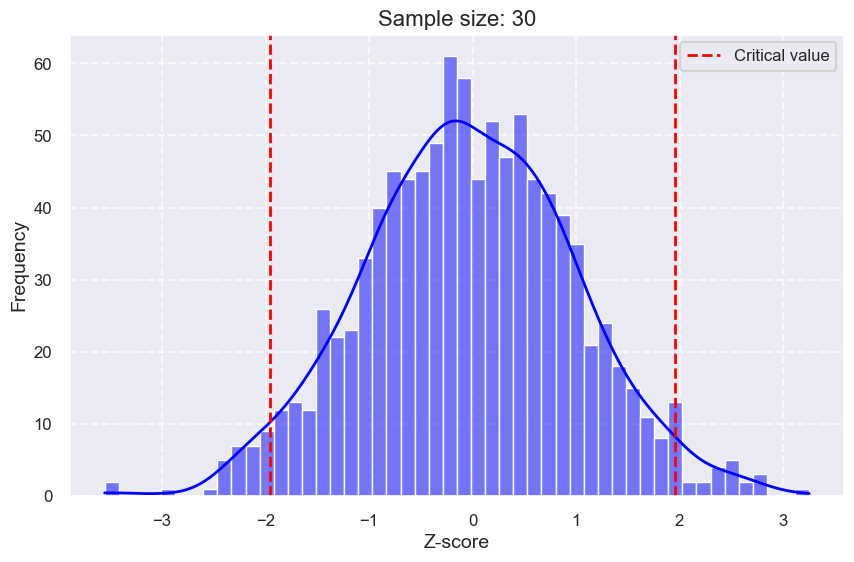

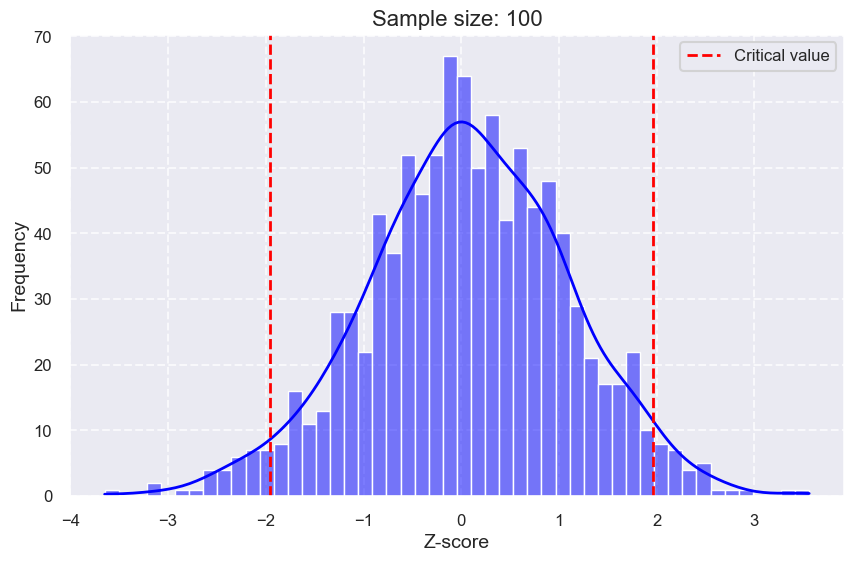

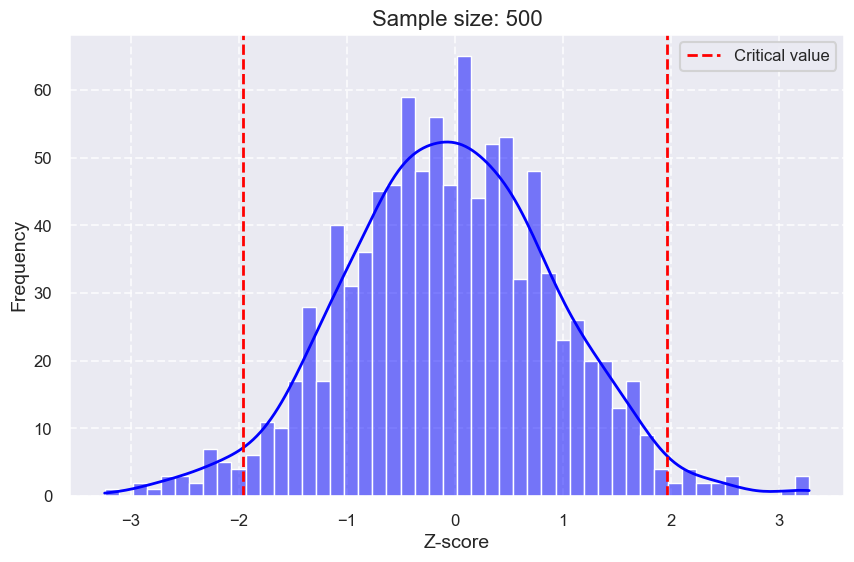

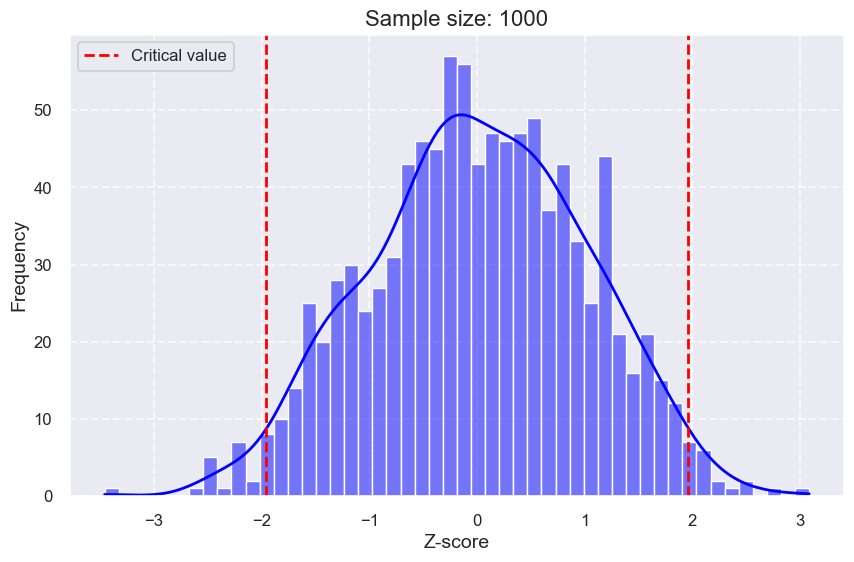

In [36]:
for n in sample_sizes_part1:
    population_z =[]
    for _ in range(simulations):
        sample_normal_population = simulation_population_data('normal', n)
        x_bar = np.mean(sample_normal_population)
        z_population = (x_bar - mu)/(sigma/np.sqrt(n))
        population_z.append(z_population)


    # Plot the histogram of the z-scores  
    plt.figure(figsize=(10, 6))
    sns.histplot(population_z, kde=True, color='blue', bins=50)
    plt.title(f'Sample size: {n}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
    plt.axvline(x=1.96, color='red', linestyle='--', label='Critical value')
    plt.axvline(x=-1.96, color='red', linestyle='--')
    plt.legend()
    plt.show()
    

       

Observation:
- **Standard Normal Distribution:** The Z-scores follow a Standard Normal Distribution with a mean of 0, regardless of the sample size.
- **Sampling Variability:** As the sample size increases, the variability of the Z-scores decreases, likely due to the reduction in standard error. 

3. Now using the sample standard deviations, compute 1000 𝑋¯−𝜇𝑠/𝑛√. Create a histogram of these values and comment on what you observe– and comment on how things change as you increase the sample size 𝑛

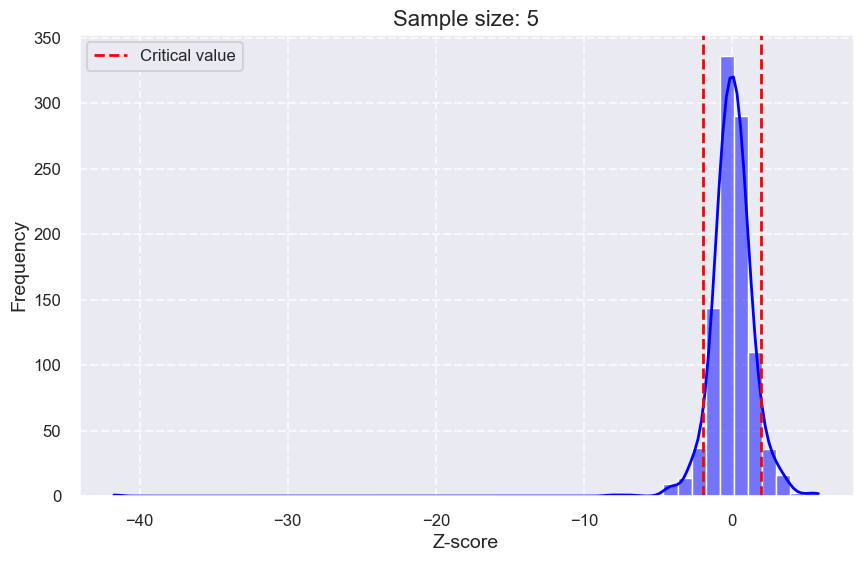

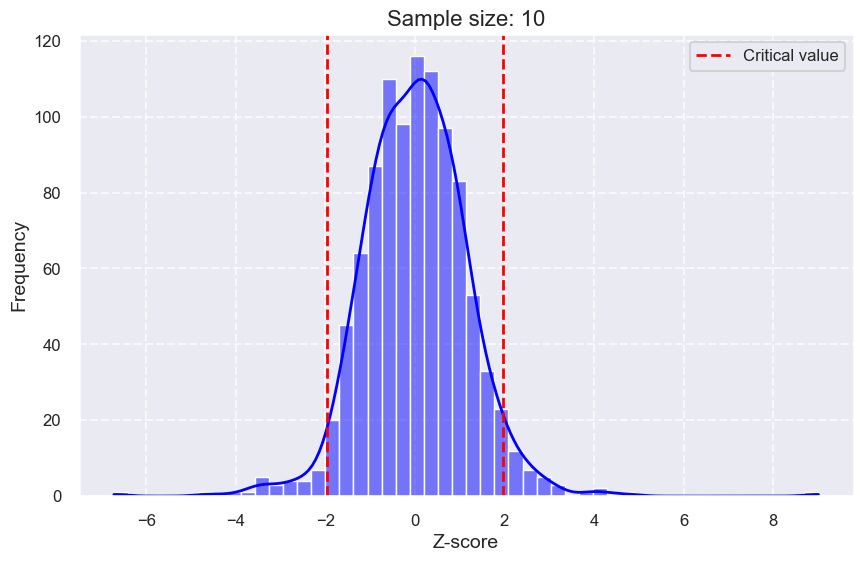

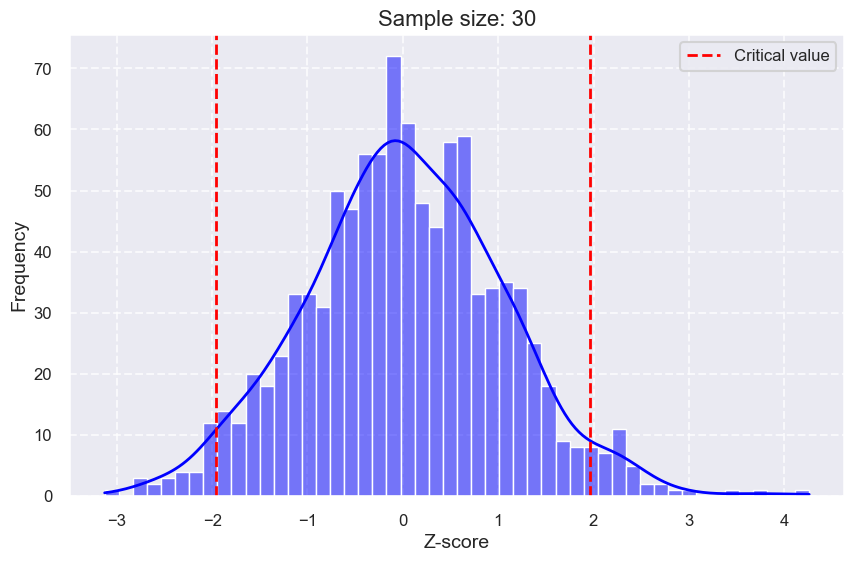

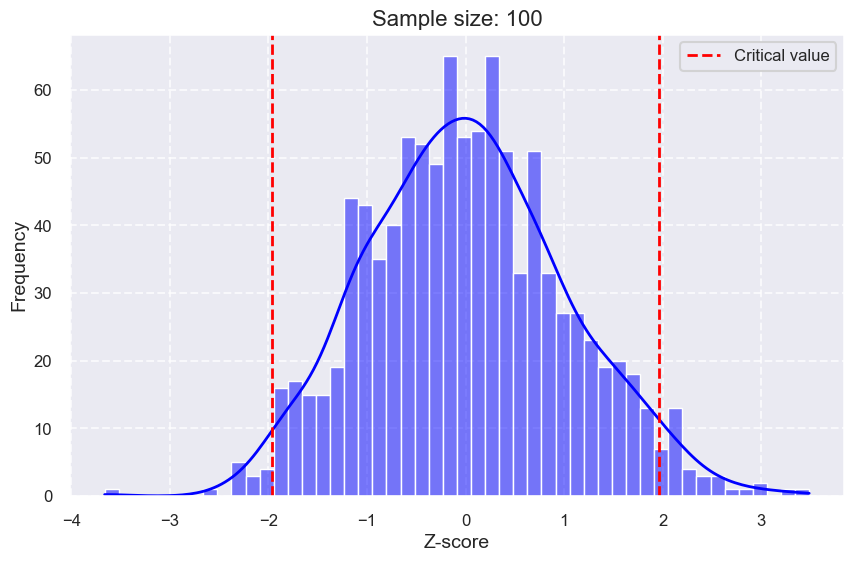

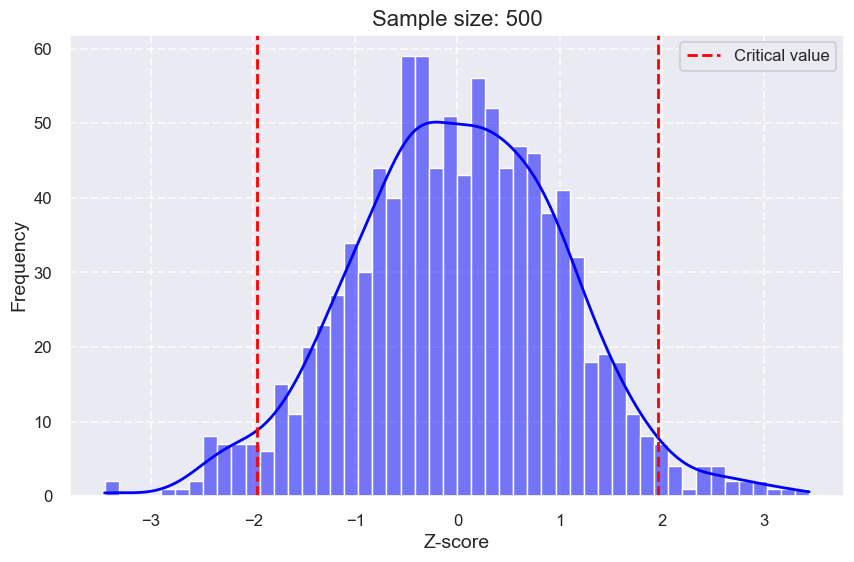

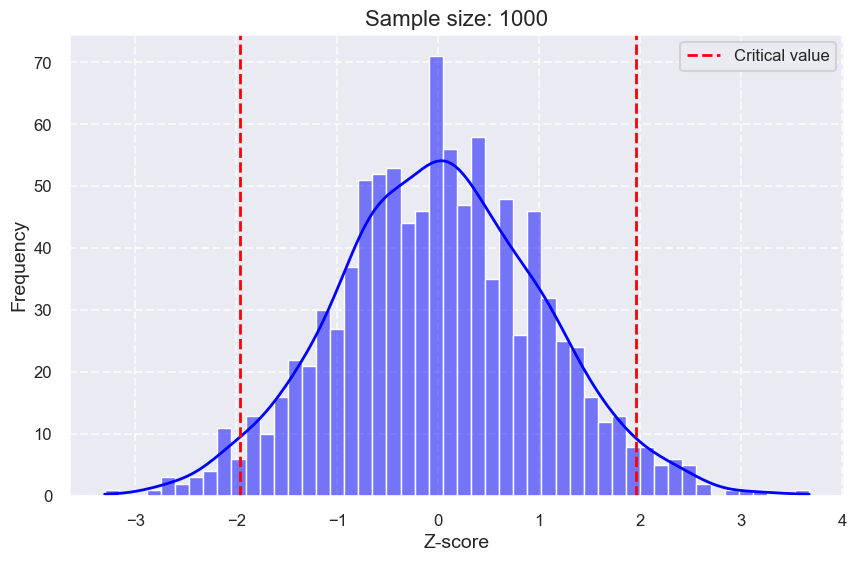

In [37]:
for n in sample_sizes_part1:
    sample_z = []
    for i in range(simulations):
        sample_normal_population = simulation_population_data('normal', n)
        x_bar = np.mean(sample_normal_population)
        s = np.std(sample_normal_population, ddof=1)
        z_sample = (x_bar - mu)/(s/np.sqrt(n))
        sample_z.append(z_sample)

    # Plot the histogram of the z-scores
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_z, kde=True, color='blue', bins=50)
    plt.title(f'Sample size: {n}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
    plt.axvline(x=1.96, color='red', linestyle='--', label='Critical value')
    plt.axvline(x=-1.96, color='red', linestyle='--')
    plt.legend()
    plt.show()
    

- **Standard Normal Distribution:** The Z-scores using sample SDs approximate the Standard Normal distribution more accurately as sample size increases.
- **Sampling Variability:** At smaller sample sizes, there is more variability in Z-scores due to the estimation of the standard deviation from the sample.

4. Create a histogram of the 1000 sample standard deviations and comment on what you observe– and comment on how things change as you increase the sample size 𝑛.

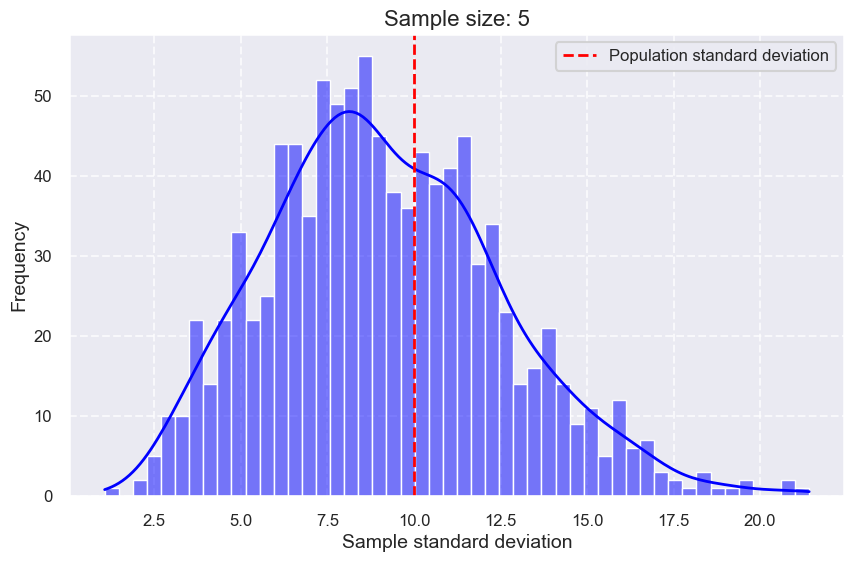

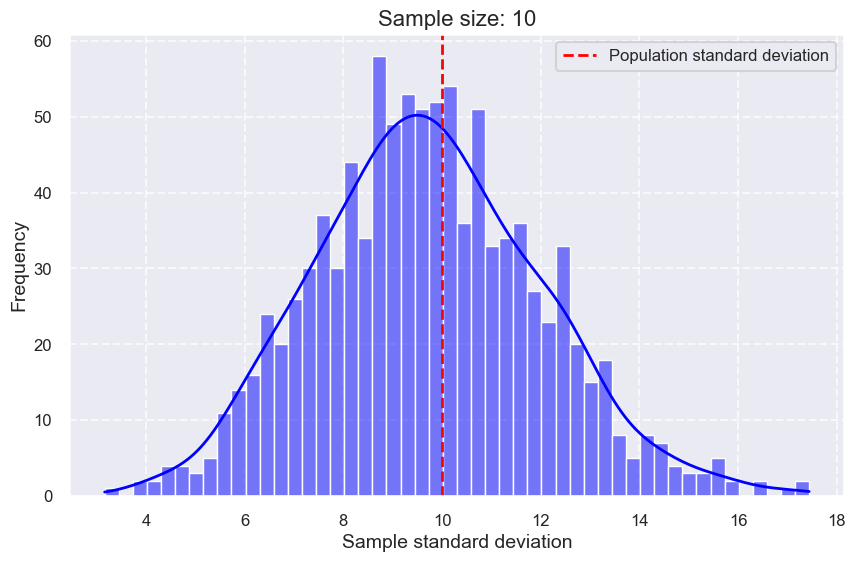

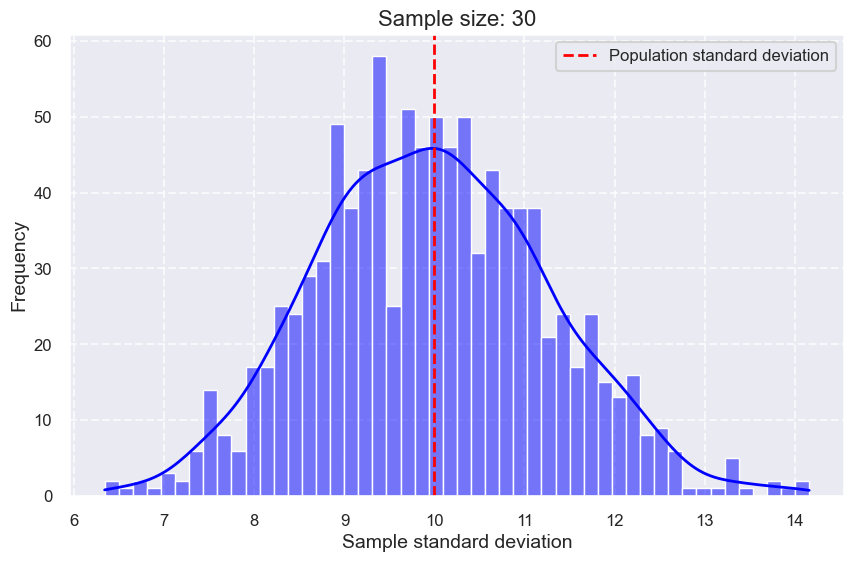

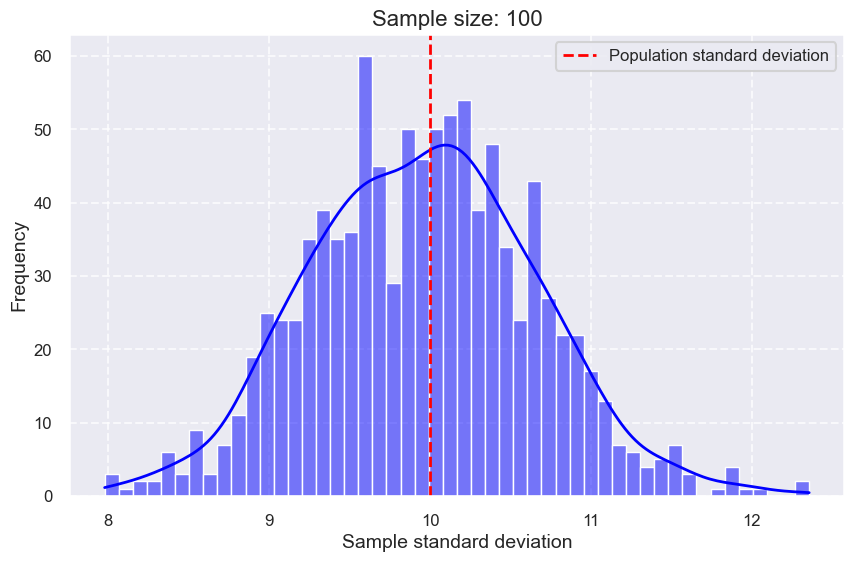

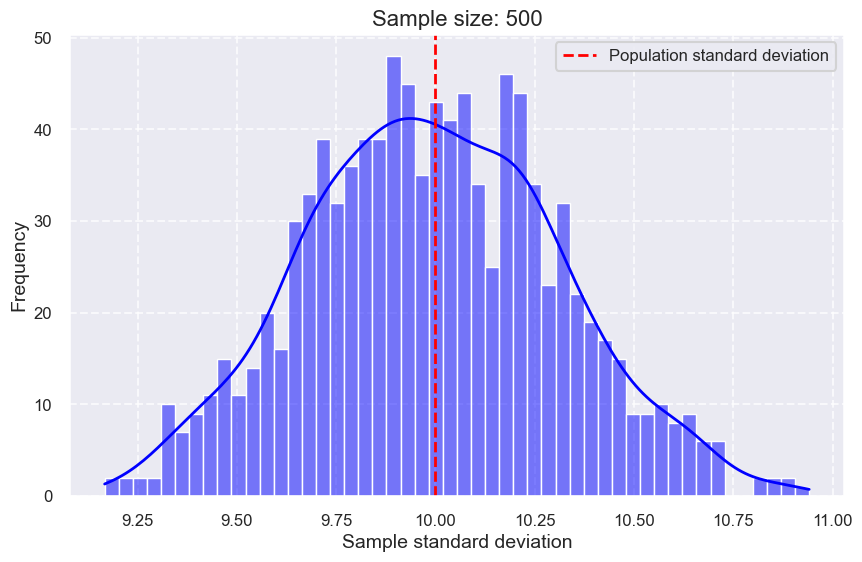

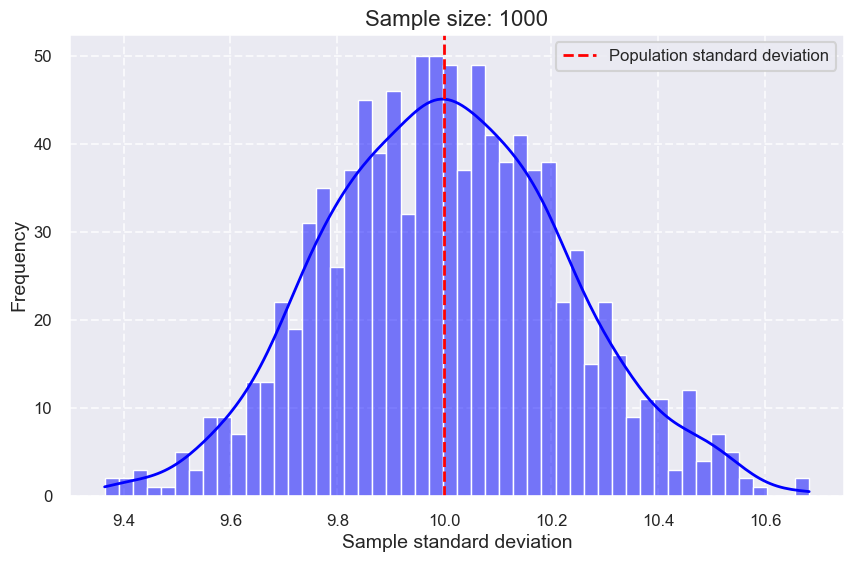

In [38]:
for n in sample_sizes_part1:
    sample_sds = []
    for _ in range(simulations):
        sample_normal_population = simulation_population_data('normal', n)
        s = np.std(sample_normal_population, ddof=1)
        sample_sds.append(s)
    
    # Plot the histogram of the sample standard deviations
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_sds, kde=True, color='blue', bins=50)
    plt.title(f'Sample size: {n}')
    plt.xlabel('Sample standard deviation')
    plt.ylabel('Frequency')
    plt.axvline(x=sigma, color='red', linestyle='--', label='Population standard deviation')
    plt.legend()
    plt.show()

- **Center:** As the sample size increases, the distribution becomes more symmetric about the population standard deviation. This means that the more more sample we have the better the estimation.
- **Spread:** There is less spread for larger sample size. In other words, sampling varibility decreases with an increase in sample size.   

5. Using a significance level of 0.05, how many of the 1000 samples reject the null hypothesis 𝐻0:𝜇=10 (with a two-sided alternative) if you were to (1) use the population standard deviation 𝜎 and a critical value based on the normal distribution (i.e., use 1.96), (2) use the sample standard deviation 𝑠 and critical value based on the normal distribution (i.e., use 1.96), and (3) use the sample standard deviation 𝑠 and critical value based on the t-distribution (how many degrees of freedom would this be?). Create a table that shows the results across the different sample sizes.

In [39]:
df_part1 = pd.DataFrame(results_normal_poulation)

df_part1['rejections_normal_sd_z'] = df_part1['rejections_normal_sd_z']/simulations
df_part1['rejections_sample_sd_z'] = df_part1['rejections_sample_sd_z']/simulations
df_part1['rejections_sample_sd_t'] = df_part1['rejections_sample_sd_t']/simulations

# rename the columns for better readability
df_part1.columns = ['Sample Size', 
                     'Rejection Rate (Normal SD, Z)', 
                     'Rejection Rate (Sample SD, Z)', 
                     'Rejection Rate (Sample SD, t)']

df_part1

,Sample Size,"Rejection Rate (Normal SD, Z)","Rejection Rate (Sample SD, Z)","Rejection Rate (Sample SD, t)"
0,5,0.047,0.100,0.045
1,10,0.047,0.071,0.049
2,30,0.042,0.053,0.040
3,100,0.049,0.051,0.046
4,500,0.046,0.051,0.049
5,1000,0.061,0.061,0.060


- Rejection rates should align closely with the nominal significance level (5%) across all sample sizes.
- Using sample SD and normal critical value may result in slightly inflated rejection rates, especially at smaller sample sizes.
- Using sample SD and t-distribution critical value maintains rejection rates closer to the nominal level, particularly in smaller samples.

Part 1: Overall Conclusion

The simulation demonstrates that increasing sample size enhances the precision of estimation procedures. Sample means converge to the population mean with reduced variability, and standardized scores align more closely with theoretical distributions. Hypothesis testing using the t-distribution provides more accurate control of Type I error rates, particularly in smaller samples, compared to using the normal distribution with sample-based SDs.

## Part 2
1. Obtain 1000 samples from the population and record the sample mean and standard deviation for each. For each population and the three sample sizes, create a histogram of the sample mean and comment on what you observe.

2. Using the sample standard deviations, compute 1000 𝑋¯−𝜇𝑠/𝑛√. For each population and the three sample sizes, create a histogram and comment on what you observe.

3. Using a significance level of 0.05, how many of the 1000 samples reject the null hypothesis 𝐻0:𝜇=10 (with a two-sided alternative) using a one-sample t-test? Create a table that compares the results for the different populations and sample sizes.

1. Obtain 1000 samples from the population and record the sample mean and standard deviation for each. For each population and the three sample sizes, create a histogram of the sample mean and comment on what you observe.

In [40]:
populations_distributions = ['normal', 'gamma', 'exponential']
results_part2 = {
    'sample_size':[],
    'rejections_normal_sd_z':[],
    'rejections_sample_sd_z':[],
    'rejections_sample_sd_t':[],
}

for pop_dist in populations_distributions:
    for n in sample_sizes_part2:
        sample_means =[]
        sample_sds = []
        population_z =[]
        sample_z =[]

        rejections_population_z = 0
        rejections_sample_z = 0
        rejections_t = 0

        for _ in range(simulations):
            # Sample from the population
            sample_population = simulation_population_data(pop_dist, n)

            # Calculate the sample mean and standard deviation
            x_bar = np.mean(sample_population)
            s = np.std(sample_population, ddof=1)
            sample_means.append(x_bar)
            sample_sds.append(s)

            # Standardize using the population standard deviation by calculating the z-score
            z_population = (x_bar - mu)/(sigma/np.sqrt(n))
            population_z.append(z_population)

            # Standardize using the sample standard deviation by calculating the z-score
            z_sample = (x_bar - mu)/(s/np.sqrt(n))
            sample_z.append(z_sample)

            # Hypothesis testing
            # 1.Using Population standard deviation known
            if np.abs(z_population) > 1.96:
                rejections_population_z += 1

            # 2.Using Sample standard deviation
            if np.abs(z_sample) > 1.96:
                rejections_sample_z += 1

            # 3.Using t-test
            t_statistic = (x_bar - mu)/(s/np.sqrt(n))
            t_critical = stats.t.ppf(0.975, n-1)
            if np.abs(t_statistic) > t_critical:
                rejections_t += 1

        results_part2['sample_size'].append(n)
        results_part2['rejections_normal_sd_z'].append(rejections_population_z)
        results_part2['rejections_sample_sd_z'].append(rejections_sample_z)
        results_part2['rejections_sample_sd_t'].append(rejections_t)

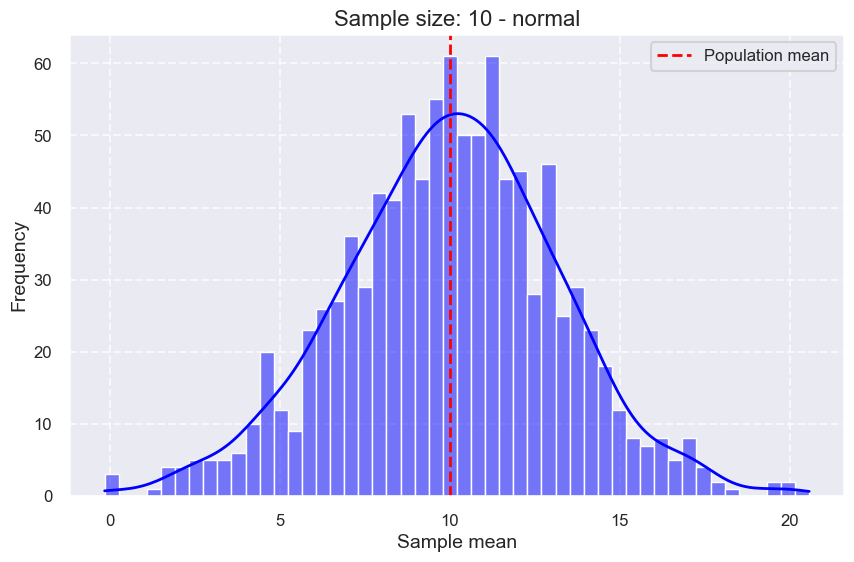

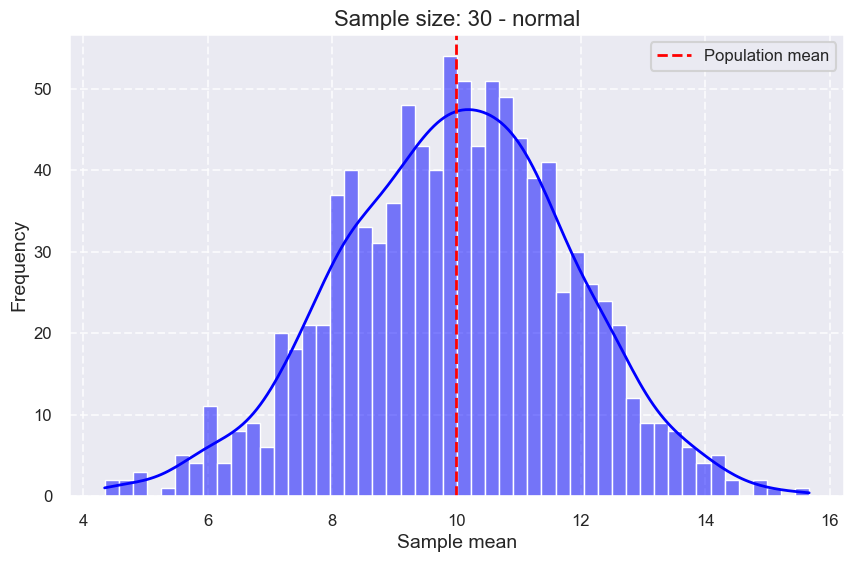

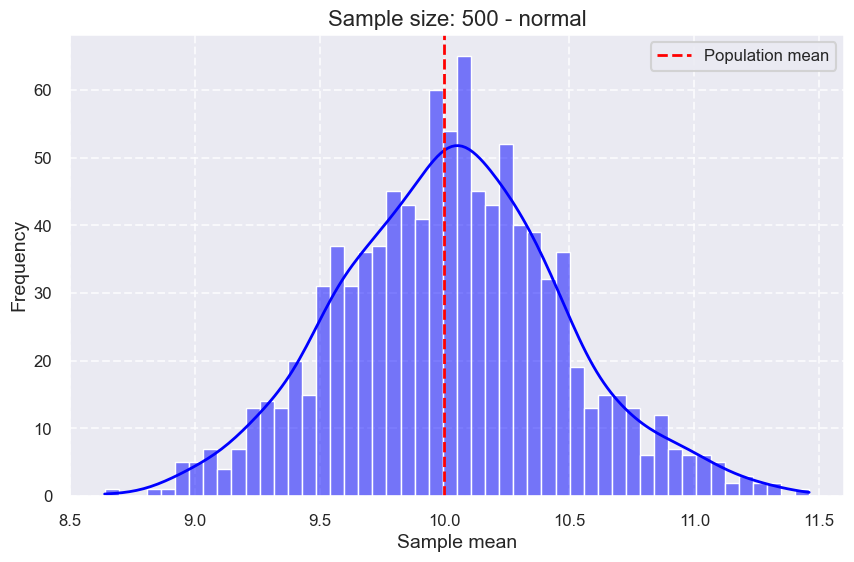

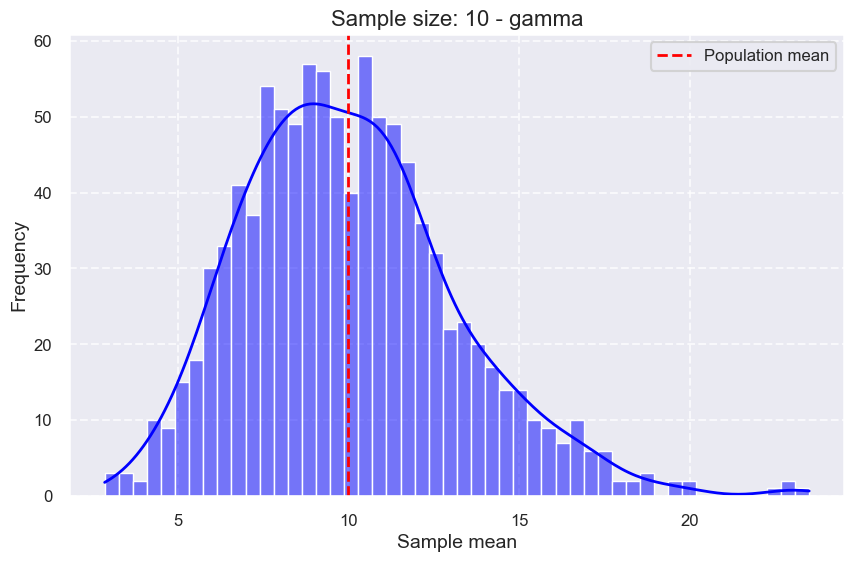

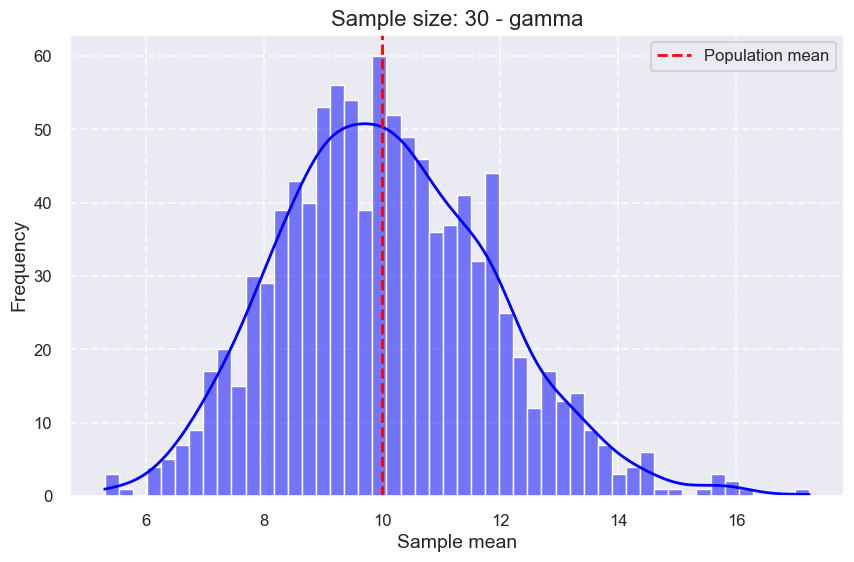

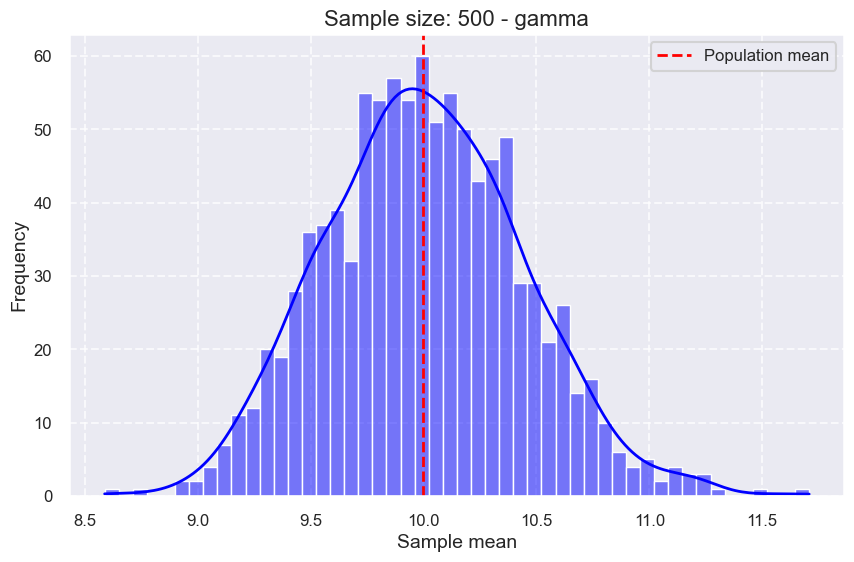

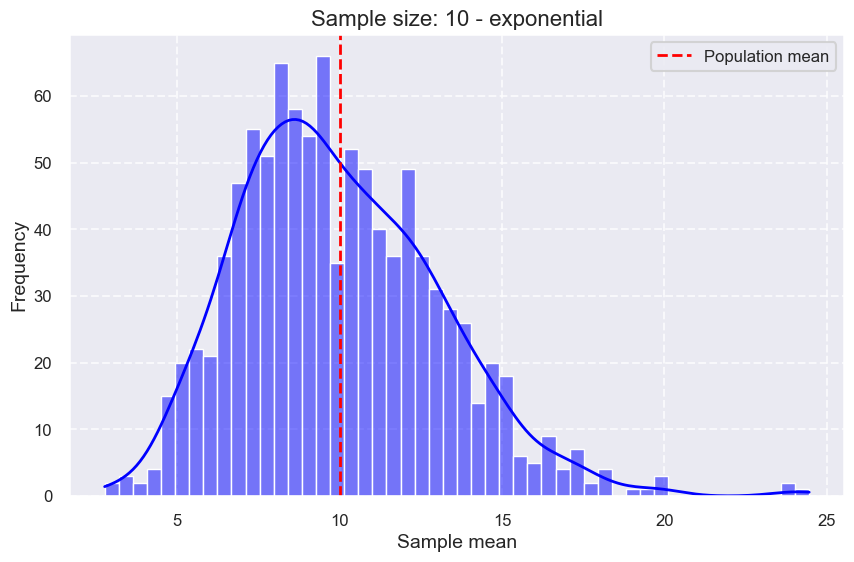

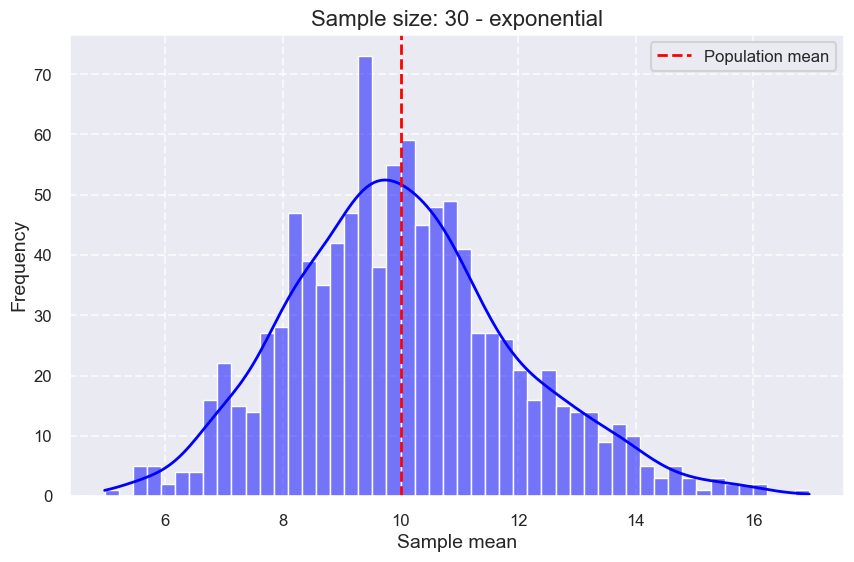

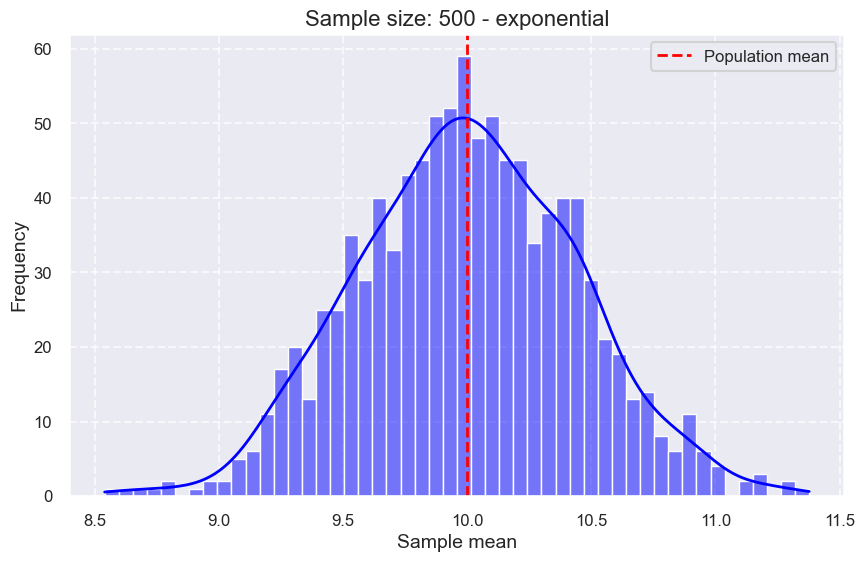

In [41]:
for pop_dist in populations_distributions:
    for n in sample_sizes_part2:
        sample_means =[]
        for _ in range(simulations):
            # Sample from the population
            sample_population = simulation_population_data(pop_dist, n)

            # Calculate the sample mean and standard deviation
            x_bar = np.mean(sample_population)
            sample_means.append(x_bar)
        # Plot the histogram of the sample means
        plt.figure(figsize=(10, 6))
        sns.histplot(sample_means, kde=True, color='blue', bins=50)
        plt.title(f'Sample size: {n} - {pop_dist}')
        plt.xlabel('Sample mean')
        plt.ylabel('Frequency')
        plt.axvline(x=mu, color='red', linestyle='--', label='Population mean')
        plt.legend()
        plt.show()

- **Normal Population:** Sample means are symmetrically distributed around μ=10 with decreasing variability as sample size increases.
- **Gamma Population:** Sample means exhibit positive skewness, which diminishes as sample size increases due to the Central Limit Theorem
- **Exponential Population**: Highly positively skewed sample means, especially noticeable at smaller sample sizes. Skewness reduces as sample size increases.

2. Using the sample standard deviations, compute 1000 𝑋¯−𝜇𝑠/𝑛√. For each population and the three sample sizes, create a histogram and comment on what you observe.

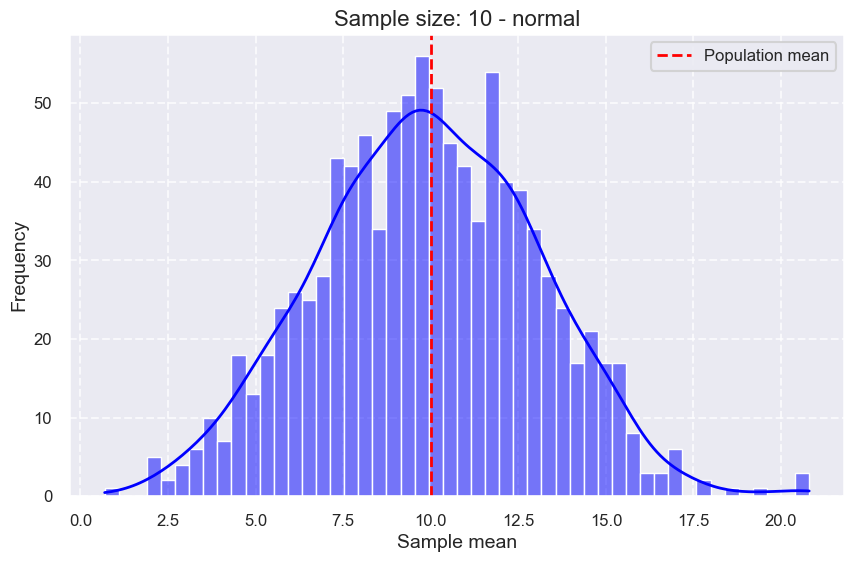

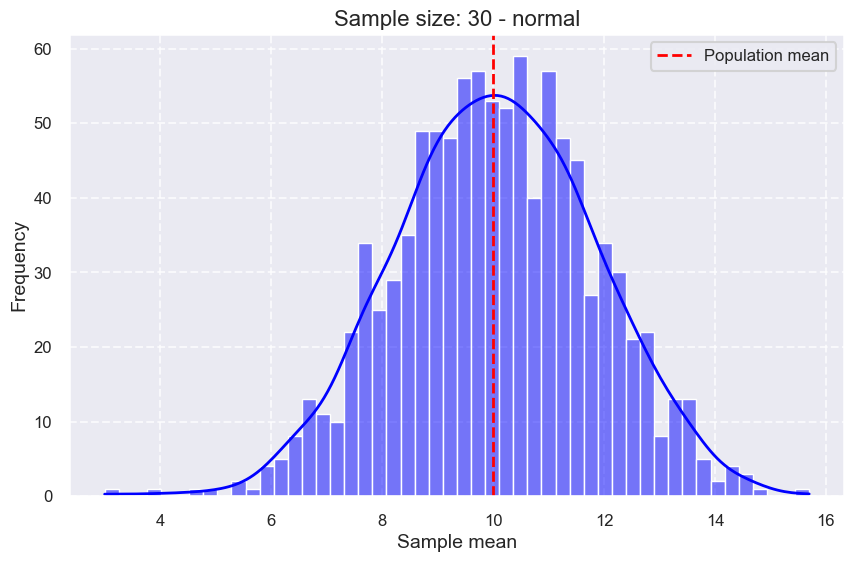

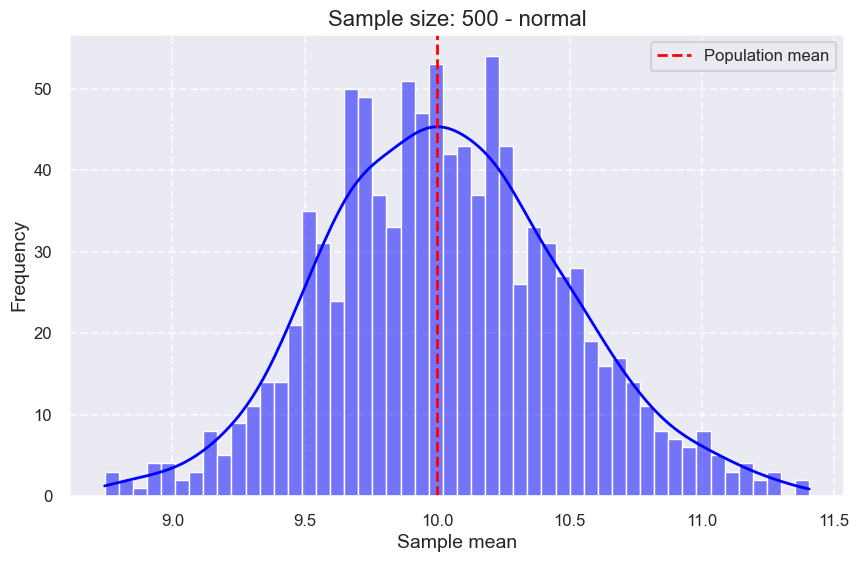

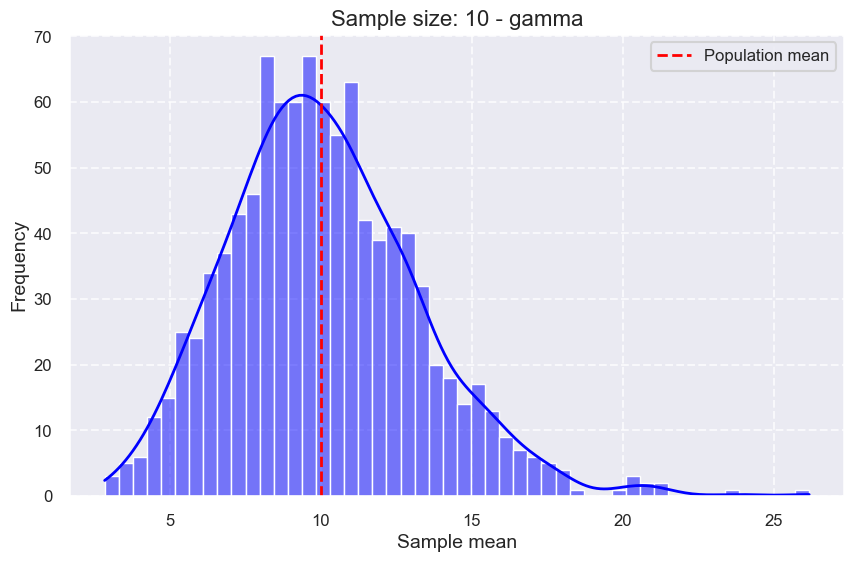

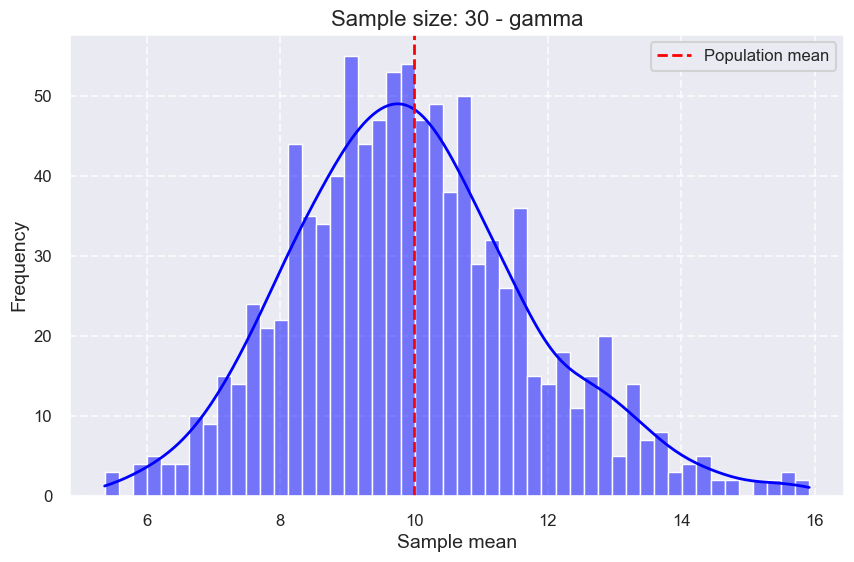

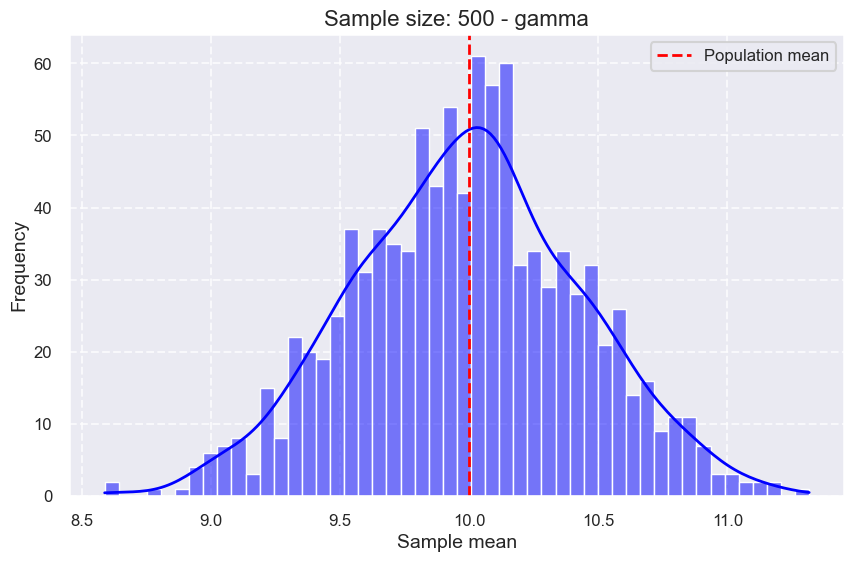

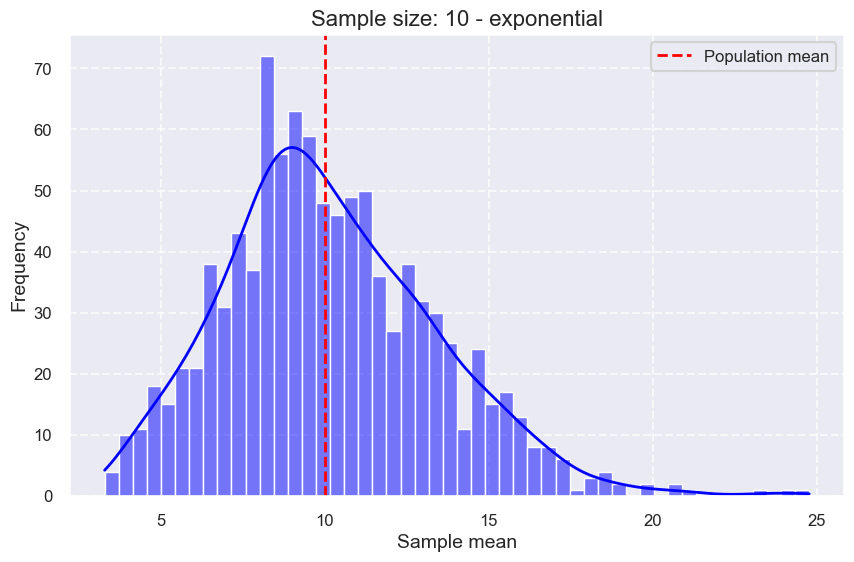

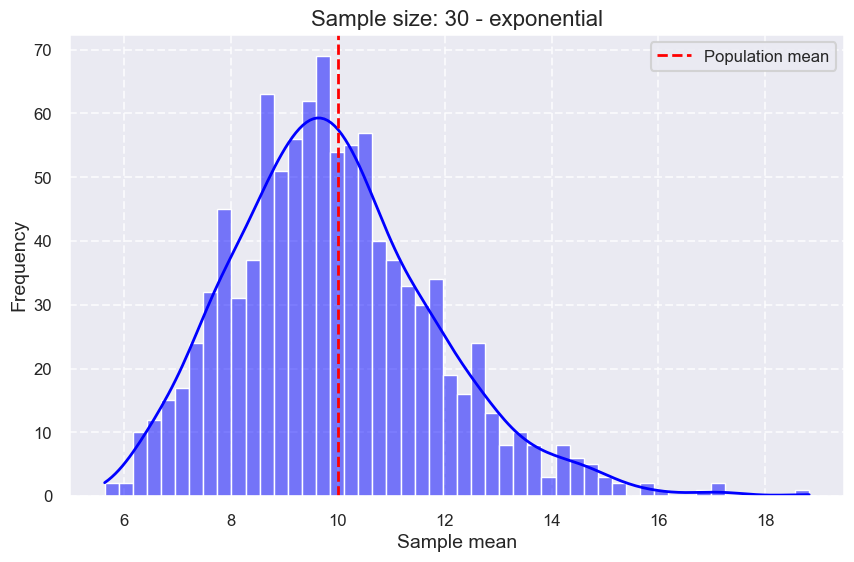

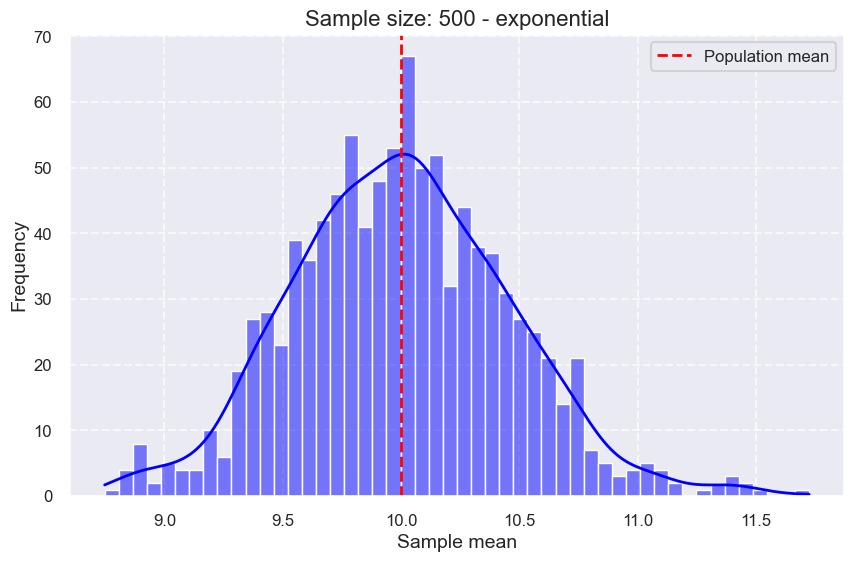

In [42]:
for pop_dist in populations_distributions:
    for n in sample_sizes_part2:
        sample_means =[]
        for _ in range(simulations):
            # Sample from the population
            sample_population = simulation_population_data(pop_dist, n)

            # Calculate the sample mean and standard deviation
            x_bar = np.mean(sample_population)
            sample_means.append(x_bar)
        # Plot the histogram of the sample means
        plt.figure(figsize=(10, 6))
        sns.histplot(sample_means, kde=True, color='blue', bins=50)
        plt.title(f'Sample size: {n} - {pop_dist}')
        plt.xlabel('Sample mean')
        plt.ylabel('Frequency')
        plt.axvline(x=mu, color='red', linestyle='--', label='Population mean')
        plt.legend()
        plt.show()

- **Normal Population:** Z-scores closely follow the Standard Normal distribution across all sample sizes.
- **Gamma Population:** Deviations from normality in Z-scores are noticeable at smaller sample sizes but diminish as n increases.
- **Exponential Population:** Significant deviations from normality in Z-scores at smaller sample sizes due to high skewness. Larger sample sizes improve normal approximation, but slight deviations may persist.

3. Using a significance level of 0.05, how many of the 1000 samples reject the null hypothesis 𝐻0:𝜇=10 (with a two-sided alternative) using a one-sample t-test? Create a table that compares the results for the different populations and sample sizes.

In [43]:
# Add population distribution type to the results
results_part2['population_distribution'] = []

for pop_dist in populations_distributions:
    for n in sample_sizes_part2:
        results_part2['population_distribution'].append(pop_dist)

# Create the DataFrame
df_part2 = pd.DataFrame(results_part2)

# Normalize the rejection rates
df_part2['rejections_normal_sd_z'] = df_part2['rejections_normal_sd_z'] / simulations
df_part2['rejections_sample_sd_z'] = df_part2['rejections_sample_sd_z'] / simulations
df_part2['rejections_sample_sd_t'] = df_part2['rejections_sample_sd_t'] / simulations

# Rename the columns for better readability
df_part2.columns = ['Sample Size', 
                    'Rejection Rate (Normal SD, Z)', 
                    'Rejection Rate (Sample SD, Z)', 
                    'Rejection Rate (Sample SD, t)',
                    'Population Distribution']

df_part2

,Sample Size,"Rejection Rate (Normal SD, Z)","Rejection Rate (Sample SD, Z)","Rejection Rate (Sample SD, t)",Population Distribution
0,10,0.044,0.066,0.043,normal
1,30,0.046,0.058,0.044,normal
2,500,0.043,0.042,0.042,normal
3,10,0.048,0.129,0.103,gamma
4,30,0.042,0.087,0.075,gamma
5,500,0.053,0.054,0.053,gamma
6,10,0.041,0.118,0.086,exponential
7,30,0.060,0.096,0.087,exponential
8,500,0.058,0.055,0.055,exponential


- **Normal Population:** Rejection rates should align closely with the nominal significance level (5%) across all sample sizes.
- **Gamma Population:** Smaller sample sizes may show inflated or deflated rejection rates due to distributional deviations; larger sample sizes restore accurate Type I error control.
- **Exponential Population:** Similar to the Gamma population, smaller sample sizes may compromise the accuracy of Type I error rates; larger sample sizes mitigate these effects, though inherent skewness may still influence results slightly.

Overall Summary Part 2:
The robustness of one-sample t-procedures is contingent upon the underlying population distribution and sample size. While the t-test performs reliably under normality across all sample sizes, deviations arise with non-normal populations (Gamma and Exponential), especially at smaller sample sizes. However, increasing the sample size enhances the t-test’s robustness, as the Central Limit Theorem facilitates the approximation of normality in sample means, thereby maintaining accurate Type I error rates.